In [88]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [89]:
%matplotlib inline

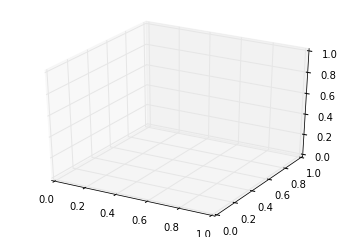

In [90]:
# 細々とした処理
fig,ax = plt.figure(),plt.axes(projection="3d")
pi = np.pi

In [118]:
# 機体パラメータ
A = 150.0
B = 220.0
C = 430.0
D = 100.0

# 最下部中心座標
x = 0.0
y = 0.0
z = -400.0

In [119]:
# 単位ベクトル
unit_vectors = np.array([[np.sin(i*pi*2/3-pi/6),np.cos(i*pi*2/3-pi/6),0] for i in range(3)])
ez = np.array([0,0,1])

In [120]:
#とりあえず臨時の角度
thetas = np.array([pi/4 for i in range(3)])

In [121]:
# 各座標の計算
A_vectors = A * unit_vectors  
B_vectors = A_vectors + B*unit_vectors* np.cos(thetas)-B*ez*np.sin(thetas)
D_vector = np.array([x,y,z])      
C_vectors = D_vector + D * unit_vectors

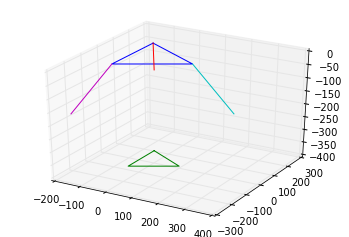

In [122]:
index = np.arange(4) % 3
ax.clear()
ax.plot(xs=A_vectors[index,0],ys=A_vectors[index,1],zs=A_vectors[index,2])
ax.plot(xs=C_vectors[index,0],ys=C_vectors[index,1],zs=C_vectors[index,2])
for i in range(3):
    temp = [[A_vectors[i,j],B_vectors[i,j]]for j in range(3)]
    ax.plot(temp[0],temp[1],temp[2])
fig

In [116]:
B_vectors

array([[ -1.45710678e+02,   2.52378298e+02,  -1.41421356e+02],
       [  2.91421356e+02,   1.78444116e-14,  -1.41421356e+02],
       [ -1.45710678e+02,  -2.52378298e+02,  -1.41421356e+02]])

In [117]:
A_vectors

array([[ -7.50000000e+01,   1.29903811e+02,   0.00000000e+00],
       [  1.50000000e+02,   9.18485099e-15,   0.00000000e+00],
       [ -7.50000000e+01,  -1.29903811e+02,   0.00000000e+00]])

In [10]:
ret = np.zeros(3)
x = 0
y = 0
z = 350
for i in range(3):
        phi = 2.0 / 3.0 * pi * (i + 1) - pi / 6.0;
        P = 0.0;
        Q = 0.0;
        R = 0.0;
        P += A * A + B * B - C * C + D * D + x * x + y * y + z * z
        P += -2 * A * D - 2 * A * x * np.sin(phi) - 2 * A * y * np.cos(phi)
        P += 2 * D * x * np.sin(phi) + 2 * D * y * np.cos(phi)

        Q += 2 * A * B - 2 * B * D - 2 * B * x * np.sin(phi) - 2 * B * y * np.cos(phi)
        R += -2 * B * z

        ret[i] = -np.arctan2(Q, R) + np.arcsin(-P / np.sqrt(Q * Q + R * R))

        ret[i] *= 180.0 / pi
        ret[i] += 180.0
        ret[i] *= -1
